In [1]:
!pip install requests beautifulsoup4

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.1
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

url_front = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%B9%B4%EB%88%88&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=44&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='

visitCount = 0

file = open('/content/gdrive/MyDrive/BigDataAnalaysis/naver-crawling.txt', 'w')

for pageIndex in range(1, 302, 10): # 실습 시간을 고려하여 302까지만 실행 (31페이지)
  pageUrl = '{0}{1}'.format(url_front, pageIndex)
  html = urlopen(pageUrl)
  bsObject = BeautifulSoup(html, 'html.parser')
  for link in bsObject.find_all('a', {'class':'news_tit'}):
    data = link.get('title') + '\n'
    file.write(data)

  visitCount += 1
  print('Read {0} page...'.format(visitCount))

  time.sleep(3)
file.close()
print('모든 데이터가 수집되었습니다.')

Read 1 page...
Read 2 page...
Read 3 page...
Read 4 page...
Read 5 page...
Read 6 page...
Read 7 page...
Read 8 page...
Read 9 page...
Read 10 page...
Read 11 page...
Read 12 page...
Read 13 page...
Read 14 page...
Read 15 page...
Read 16 page...
Read 17 page...
Read 18 page...
Read 19 page...
Read 20 page...
Read 21 page...
Read 22 page...
Read 23 page...
Read 24 page...
Read 25 page...
Read 26 page...
Read 27 page...
Read 28 page...
Read 29 page...
Read 30 page...
Read 31 page...
모든 데이터가 수집되었습니다.


In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 21.3 MB/s eta 0:00:00


In [9]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('태풍', 'Noun'), ("'", 'Punctuation'), ('카눈', 'Noun'), ("'", 'Punctuation'), ('에', 'Josa'), ('대구', 'Noun'), ('서', 'Josa'), ('실종', 'Noun'), ('된', 'Verb'), ('60', 'Number'), ('대', 'Verb'), ('숨져', 'Verb'), ('\n', 'Foreign')]
---
[("'", 'Punctuation'), ('카눈', 'Noun'), ("'", 'Punctuation'), ('떠난', 'Verb'), ('수도권', 'Noun'), ('최대', 'Noun'), ('40', 'Number'), ('㎜', 'Foreign'), ('비', 'Noun'), ('…', 'Punctuation'), ('남부', 'Noun'), ('지방', 'Noun'), ('다시', 'Noun'), ('폭염', 'Noun'), ('특보', 'Noun'), ('[', 'Punctuation'), ('오늘날', 'Noun'), ('씨', 'Suffix'), (']', 'Punctuation'), ('\n', 'Foreign')]
---
[('[', 'Punctuation'), ('태풍', 'Noun'), ('카눈', 'Noun'), (']', 'Punctuation'), ("'", 'Punctuation'), ('세계', 'Noun'), ('유산', 'Noun'), ('도전', 'Noun'), ("'", 'Punctuation'), ('국보', 'Noun'), ('반', 'Modifier'), ('구대', 'Noun'), ('암', 'Modifier'), ('각', 'Modifier'), ('화', 'Noun'), (',', 'Punctuation'), ('13일', 'Number'), ('만에', 'Josa'), ('또', 'Noun'), ('침수', 'Noun'), ('\n', 'Foreign')]
---
[("'", 'Punctuation'), ('마

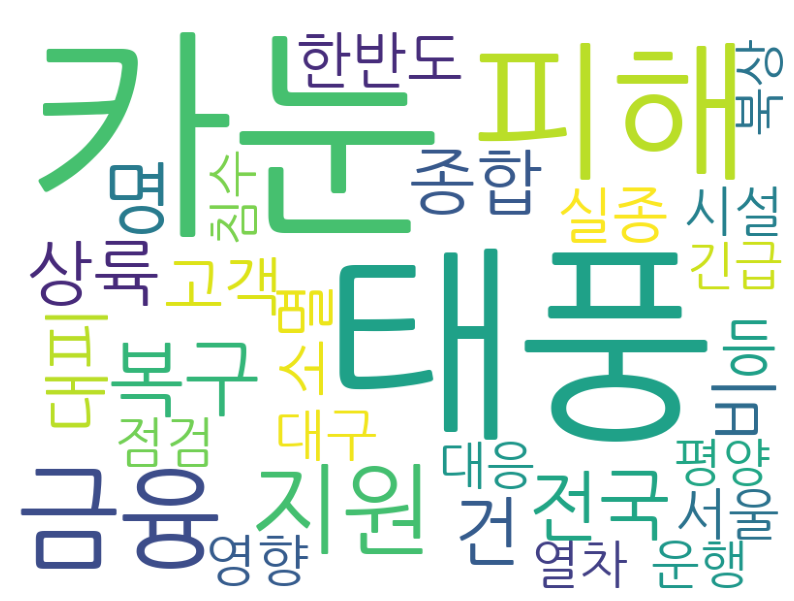

In [14]:
# 수집한 데이터 title_list 리스트에 넣기
title_list = []

with open("/content/gdrive/MyDrive/BigDataAnalaysis/naver-crawling.txt", 'r', encoding='utf-8') as file :
    title_list = file.readlines()

# 형태소 분석하여 sentences_tag 리스트에 넣기
twitter = Twitter()
sentences_tag = []

for sentence in title_list :
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    print(morph)
    print('-'*3)

print(sentences_tag)
print('\n'*3)

# 명사와 형용사만 구분하여 noun_adj_list 리스트에 넣기
noun_adj_list = []

for sentence1 in sentences_tag :
    for word, tag in sentence1 :
        if tag in ['Noun', 'Adjective'] :
            noun_adj_list.append(word)

# 형태소별 단어 카운트 및 상위 30개 단어 tags 리스트에 넣기
counts = Counter(noun_adj_list)
tags = counts.most_common(30)
print(tags)

# 한글 깨지는 문제 해결하기 위해 폰트 설정
wc = WordCloud(font_path='/content/gdrive/MyDrive/BigDataAnalaysis/NanumGothic.ttf', background_color='white', width=800, height=600)

# 워드 클라우드 생성
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()